# Tarea N°02

## Instrucciones

1.- Completa tus datos personales (nombre y rol USM) en siguiente celda.


* __Nombre__:

* __Rol__:

2.- Debes _pushear_ este archivo con tus cambios a tu repositorio personal del curso, incluyendo datos, imágenes, scripts, etc.

3.- Se evaluará:
    - Soluciones
    - Código
    - Que Binder esté bien configurado.
    - Al presionar  `Kernel -> Restart Kernel and Run All Cells` deben ejecutarse todas las celdas sin error.

## I.- Clasificación de dígitos


En este laboratorio realizaremos el trabajo de reconocer un dígito a partir de una imagen.


![rgb](https://www.wolfram.com/language/11/neural-networks/assets.en/digit-classification/smallthumb_1.png)

El objetivo es a partir de los datos, hacer la mejor predicción de cada imagen. Para ellos es necesario realizar los pasos clásicos de un proyecto de _Machine Learning_, como estadística descriptiva, visualización y preprocesamiento. 

* Se solicita ajustar al menos tres modelos de clasificación:
 * Regresión logística
 * K-Nearest Neighbours 
 * Uno o más algoritmos a su elección [link](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning) (es obligación escoger un _estimator_ que tenga por lo menos un hiperparámetro). 
 
 
* En los modelos que posean hiperparámetros es mandatorio buscar el/los mejores con alguna técnica disponible en `scikit-learn` ([ver más](https://scikit-learn.org/stable/modules/grid_search.html#tuning-the-hyper-parameters-of-an-estimator)).
* Para cada modelo, se debe realizar _Cross Validation_ con 10 _folds_ utilizando los datos de entrenamiento con tal de determinar un intervalo de confianza para el _score_ del modelo.
* Realizar una predicción con cada uno de los tres modelos con los datos _test_ y obtener el _score_. 
* Analizar sus métricas de error (**accuracy**, **precision**, **recall**, **f-score**)



### Exploración de los datos
A continuación se carga el conjunto de datos a utilizar, a través del sub-módulo `datasets` de `sklearn`.

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots, show

from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

from sklearn.neighbors import KNeighborsClassifier

from sklearn import svm
from sklearn.svm import SVC

import seaborn as sns

from sklearn.model_selection import cross_val_score

from sklearn.datasets import load_digits
from sklearn.model_selection import validation_curve

from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.preprocessing import label_binarize

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

from sklearn.decomposition import PCA

from sklearn.preprocessing import LabelEncoder

import missingno as msno

from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

from sklearn.preprocessing import scale 
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import ElasticNetCV


import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
digits_dict = datasets.load_digits()
print(digits_dict["DESCR"])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [3]:
digits_dict.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [4]:
digits_dict["target"]

array([0, 1, 2, ..., 8, 9, 8])

A continuación se crea dataframe declarado como `digits` con los datos de `digits_dict` tal que tenga 65 columnas, las 6 primeras a la representación de la imagen en escala de grises (0-blanco, 255-negro) y la última correspondiente al dígito (`target`) con el nombre _target_.

In [5]:
digits = (
    pd.DataFrame(
        digits_dict["data"],
    )
    .rename(columns=lambda x: f"c{x:02d}")
    .assign(target=digits_dict["target"])
    .astype(int)
)

digits.head()

,c00,c01,c02,c03,c04,c05,c06,c07,c08,c09,...,c55,c56,c57,c58,c59,c60,c61,c62,c63,target
0,0,0,5,13,9,1,0,0,0,0,...,0,0,0,6,13,10,0,0,0,0
1,0,0,0,12,13,5,0,0,0,0,...,0,0,0,0,11,16,10,0,0,1
2,0,0,0,4,15,12,0,0,0,0,...,0,0,0,0,3,11,16,9,0,2
3,0,0,7,15,13,1,0,0,0,8,...,0,0,0,7,13,13,9,0,0,3
4,0,0,0,1,11,0,0,0,0,0,...,0,0,0,0,2,16,4,0,0,4


### Ejercicio 1
**Análisis exploratorio:** Realiza tu análisis exploratorio, no debes olvidar nada! Recuerda, cada análisis debe responder una pregunta.

Algunas sugerencias:

* ¿Cómo se distribuyen los datos?
* ¿Cuánta memoria estoy utilizando?
* ¿Qué tipo de datos son?
* ¿Cuántos registros por clase hay?
* ¿Hay registros que no se correspondan con tu conocimiento previo de los datos?

In [6]:
digits.shape

(1797, 65)

In [7]:
digits.isnull().sum(axis = 0)

c00       0
c01       0
c02       0
c03       0
c04       0
         ..
c60       0
c61       0
c62       0
c63       0
target    0
Length: 65, dtype: int64

In [8]:
digits.describe().T

,count,mean,std,min,25%,50%,75%,max
c00,1797.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
c01,1797.0,0.303840,0.907192,0.0,0.0,0.0,0.0,8.0
c02,1797.0,5.204786,4.754826,0.0,1.0,4.0,9.0,16.0
c03,1797.0,11.835838,4.248842,0.0,10.0,13.0,15.0,16.0
c04,1797.0,11.848080,4.287388,0.0,10.0,13.0,15.0,16.0
...,...,...,...,...,...,...,...,...
c60,1797.0,11.809126,4.933947,0.0,10.0,14.0,16.0,16.0
c61,1797.0,6.764051,5.900623,0.0,0.0,6.0,12.0,16.0
c62,1797.0,2.067891,4.090548,0.0,0.0,0.0,2.0,16.0
c63,1797.0,0.364496,1.860122,0.0,0.0,0.0,0.0,16.0


In [9]:
digits["target"].unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [10]:
digits["target"].value_counts()

3    183
1    182
5    182
4    181
6    181
9    180
7    179
0    178
2    177
8    174
Name: target, dtype: int64

<AxesSubplot:xlabel='target', ylabel='count'>

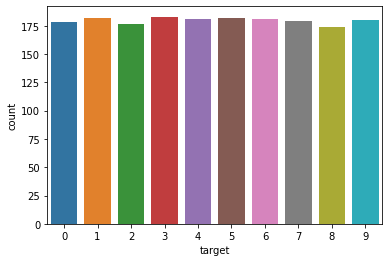

In [11]:
sns.countplot(digits["target"])

### Ejercicio 2
**Visualización:** Para visualizar los datos utilizaremos el método `imshow` de `matplotlib`. Resulta necesario convertir el arreglo desde las dimensiones (1,64)  a (8,8) para que la imagen sea cuadrada y pueda distinguirse el dígito. Superpondremos además el label correspondiente al dígito, mediante el método `text`. Esto nos permitirá comparar la imagen generada con la etiqueta asociada a los valores. Realizaremos lo anterior para los primeros 25 datos del archivo.

In [12]:
digits_dict["images"][0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

Visualiza imágenes de los dígitos utilizando la llave `images` de `digits_dict`. 

Sugerencia: Utiliza `plt.subplots` y el método `imshow`. Puedes hacer una grilla de varias imágenes al mismo tiempo!

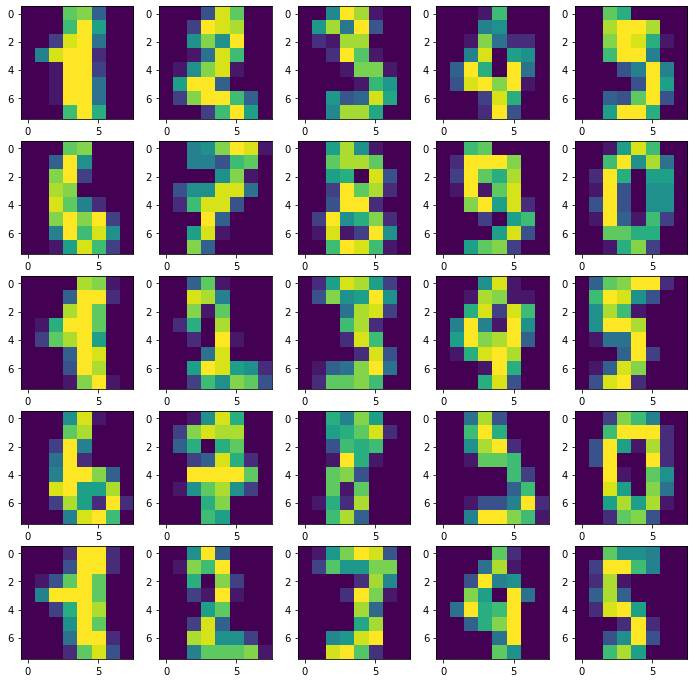

In [13]:
nx, ny = 5, 5
fig, axs = plt.subplots(nx, ny, figsize=(12, 12))
for i in range(1,26):
    plt.subplot(5,5,i)
    plt.imshow(digits_dict["images"][i])

### Ejercicio 3

**Machine Learning**: En esta parte usted debe entrenar los distintos modelos escogidos desde la librería de `skelearn`. Para cada modelo, debe realizar los siguientes pasos:

* **train-test** 
 * Crear conjunto de entrenamiento y testeo (usted determine las proporciones adecuadas).
 * Imprimir por pantalla el largo del conjunto de entrenamiento y de testeo.
 
 
* **modelo**:
 * Instanciar el modelo objetivo desde la librería sklearn.
 * *Hiper-parámetros*: Utiliza `sklearn.model_selection.GridSearchCV` para obtener la mejor estimación de los parámetros del modelo objetivo.




* **Métricas**:
 * Graficar matriz de confusión.
 * Analizar métricas de error.



__Preguntas a responder:__

* ¿Cuál modelo es mejor basado en sus métricas?
* ¿Cuál modelo demora menos tiempo en ajustarse?
* ¿Qué modelo escoges?


In [14]:
X = digits.drop(columns="target").values
y = digits["target"].values

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)

## Regresion Logistica

In [16]:
parameters = {'penalty': ['l1', 'l2', 'elasticnet'], 'C':[1, 10]}
reg = LogisticRegression()
gs = GridSearchCV(reg, parameters)
gs.fit(X_train, y_train)
print("Best: %f con %s" % (gs.best_score_, gs.best_params_))

Best: 0.956254 con {'C': 1, 'penalty': 'l2'}


In [17]:
rlog = LogisticRegression(penalty="l2",C=1)
rlog.fit(X_train, y_train)

LogisticRegression(C=1)

In [18]:
y_true =  list(y_test)
y_pred = list(rlog.predict(X_test))


Matriz de confusion:
 
[[44  0  0  0  0  0  0  0  0  0]
 [ 0 60  0  0  2  0  1  0  3  2]
 [ 0  0 52  0  0  0  0  0  0  0]
 [ 0  0  0 51  0  1  0  1  1  1]
 [ 0  0  0  0 52  0  0  1  0  0]
 [ 0  0  0  1  0 45  0  1  0  0]
 [ 0  1  0  0  0  0 57  0  0  0]
 [ 0  0  0  0  0  0  0 49  0  1]
 [ 0  3  0  0  0  3  0  0 52  0]
 [ 0  0  0  0  0  0  0  3  1 51]]


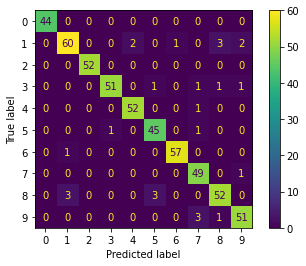

In [19]:
print('\nMatriz de confusion:\n ')
print(confusion_matrix(y_true,y_pred))
mat=plot_confusion_matrix(rlog,X_test,y_test)

In [20]:
from sklearn.metrics import classification_report

In [21]:
target_names = ['numero '+ str(i) for i in range(0,10)]
print(classification_report(y_test, y_pred, target_names=target_names, digits=5))

              precision    recall  f1-score   support

    numero 0    1.00000   1.00000   1.00000        44
    numero 1    0.93750   0.88235   0.90909        68
    numero 2    1.00000   1.00000   1.00000        52
    numero 3    0.98077   0.92727   0.95327        55
    numero 4    0.96296   0.98113   0.97196        53
    numero 5    0.91837   0.95745   0.93750        47
    numero 6    0.98276   0.98276   0.98276        58
    numero 7    0.89091   0.98000   0.93333        50
    numero 8    0.91228   0.89655   0.90435        58
    numero 9    0.92727   0.92727   0.92727        55

    accuracy                        0.95000       540
   macro avg    0.95128   0.95348   0.95195       540
weighted avg    0.95065   0.95000   0.94990       540



## K Neighbors

In [22]:
parameters = {'algorithm': ["ball_tree", "kd_tree", "brute"], 'n_neighbors':range(11), "leaf_size" : range(60)}
clf = KNeighborsClassifier()
gs = GridSearchCV(clf, parameters)
gs.fit(X_train, y_train)
print("Best: %f con %s" % (gs.best_score_, gs.best_params_))

Best: 0.988864 con {'algorithm': 'ball_tree', 'leaf_size': 1, 'n_neighbors': 1}


In [23]:
clf = KNeighborsClassifier(algorithm= "ball_tree", leaf_size= 1, n_neighbors= 1)
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='ball_tree', leaf_size=1, n_neighbors=1)

In [24]:
y_true =  list(y_test)
y_pred = list(clf.predict(X_test))


Matriz de confusion:
 
[[44  0  0  0  0  0  0  0  0  0]
 [ 0 68  0  0  0  0  0  0  0  0]
 [ 0  0 52  0  0  0  0  0  0  0]
 [ 0  0  0 55  0  0  0  0  0  0]
 [ 0  0  0  0 53  0  0  0  0  0]
 [ 0  0  0  0  0 47  0  0  0  0]
 [ 0  1  0  0  0  0 57  0  0  0]
 [ 0  0  0  0  0  0  0 50  0  0]
 [ 0  3  0  0  0  0  0  0 54  1]
 [ 0  0  0  0  0  2  0  0  2 51]]


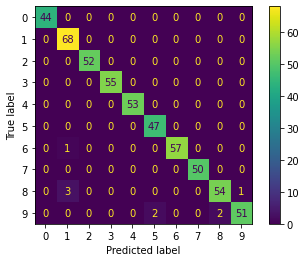

In [25]:
print('\nMatriz de confusion:\n ')
print(confusion_matrix(y_true,y_pred))
plot_confusion_matrix(clf,X_test,y_test)

In [26]:
target_names = ['numero '+ str(i) for i in range(0,10)]
print(classification_report(y_test, y_pred, target_names=target_names, digits=5))

              precision    recall  f1-score   support

    numero 0    1.00000   1.00000   1.00000        44
    numero 1    0.94444   1.00000   0.97143        68
    numero 2    1.00000   1.00000   1.00000        52
    numero 3    1.00000   1.00000   1.00000        55
    numero 4    1.00000   1.00000   1.00000        53
    numero 5    0.95918   1.00000   0.97917        47
    numero 6    1.00000   0.98276   0.99130        58
    numero 7    1.00000   1.00000   1.00000        50
    numero 8    0.96429   0.93103   0.94737        58
    numero 9    0.98077   0.92727   0.95327        55

    accuracy                        0.98333       540
   macro avg    0.98487   0.98411   0.98425       540
weighted avg    0.98366   0.98333   0.98324       540



## SVM

In [27]:
parameters = {'kernel':['linear', 'polynomial', 'rbf', 'sigmoid'], 'C':range(11), 'degree' : range(11) }
sv = svm.SVC()
gs_svm = GridSearchCV(sv, parameters)
gs_svm.fit(X_train, y_train)
print("Best: %f con %s" % (gs_svm.best_score_, gs_svm.best_params_))

Best: 0.991245 con {'C': 3, 'degree': 0, 'kernel': 'rbf'}


In [28]:
clf_svm = SVC(kernel= 'rbf', C=3, degree=0)
clf_svm.fit(X_train, y_train)

SVC(C=3, degree=0)

In [29]:
y_true =  list(y_test)
y_pred = list(gs_svm.predict(X_test))


Matriz de confusion:
 
[[44  0  0  0  0  0  0  0  0  0]
 [ 0 68  0  0  0  0  0  0  0  0]
 [ 0  0 52  0  0  0  0  0  0  0]
 [ 0  0  0 55  0  0  0  0  0  0]
 [ 0  0  0  0 53  0  0  0  0  0]
 [ 0  0  0  0  0 47  0  0  0  0]
 [ 0  0  0  0  0  0 58  0  0  0]
 [ 0  0  0  0  0  0  0 50  0  0]
 [ 0  3  0  0  0  0  0  0 55  0]
 [ 0  0  0  0  0  0  0  0  1 54]]


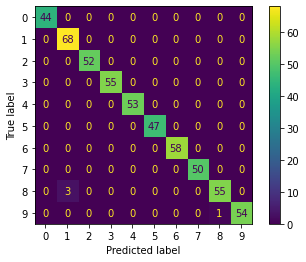

In [30]:
print('\nMatriz de confusion:\n ')
print(confusion_matrix(y_true,y_pred))
plot_confusion_matrix(gs_svm,X_test,y_test)

In [31]:
target_names = ['numero '+ str(i) for i in range(0,10)]
print(classification_report(y_test, y_pred, target_names=target_names, digits=5))

              precision    recall  f1-score   support

    numero 0    1.00000   1.00000   1.00000        44
    numero 1    0.95775   1.00000   0.97842        68
    numero 2    1.00000   1.00000   1.00000        52
    numero 3    1.00000   1.00000   1.00000        55
    numero 4    1.00000   1.00000   1.00000        53
    numero 5    1.00000   1.00000   1.00000        47
    numero 6    1.00000   1.00000   1.00000        58
    numero 7    1.00000   1.00000   1.00000        50
    numero 8    0.98214   0.94828   0.96491        58
    numero 9    1.00000   0.98182   0.99083        55

    accuracy                        0.99259       540
   macro avg    0.99399   0.99301   0.99342       540
weighted avg    0.99276   0.99259   0.99258       540



### Ejercicio 4

__Comprensión del modelo:__ Tomando en cuenta el mejor modelo entontrado en el `Ejercicio 3`, debe comprender e interpretar minuciosamente los resultados y gráficos asocados al modelo en estudio, para ello debe resolver los siguientes puntos:



 * **Cross validation**: usando **cv** (con n_fold = 10), sacar una especie de "intervalo de confianza" sobre alguna de las métricas estudiadas en clases: 
  * $\mu \pm \sigma$ = promedio $\pm$ desviación estandar
 * **Curva de Validación**: Replica el ejemplo del siguiente [link](https://scikit-learn.org/stable/auto_examples/model_selection/plot_validation_curve.html#sphx-glr-auto-examples-model-selection-plot-validation-curve-py) pero con el modelo, parámetros y métrica adecuada. Saque conclusiones del gráfico.
 * **Curva AUC–ROC**: Replica el ejemplo del siguiente  [link](https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py) pero con el modelo, parámetros y métrica adecuada. Saque conclusiones del gráfico.

In [32]:
clf_final = SVC(kernel= 'rbf', C=3, degree=0)
scores = cross_val_score(clf_final, X, y, cv=10)
print("intervalo de confianza para Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

intervalo de confianza para Accuracy: 0.98 (+/- 0.04)


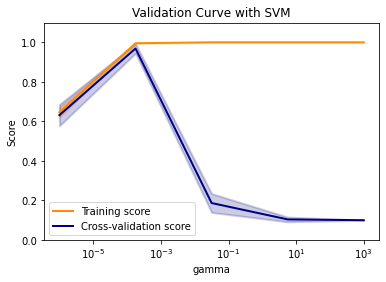

In [33]:
X, y = load_digits(return_X_y=True)

param_range = np.logspace(-6, 3, 5)
train_scores, test_scores = validation_curve(
     SVC(kernel= 'rbf', C=3, degree=0), X, y, param_name="gamma", param_range=param_range,
    scoring="accuracy", n_jobs=1,cv=10)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

fig, ax = subplots()



plt.title('Validation Curve with SVM')

plt.ylim(0.0, 1.1)
lw = 2
ax.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
ax.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
ax.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
ax.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
ax.legend(loc="best")
ax.set_xlabel('gamma')
ax.set_ylabel('Score')
show()

notamos que lo mejor seria  tomar un gama de 0.0001

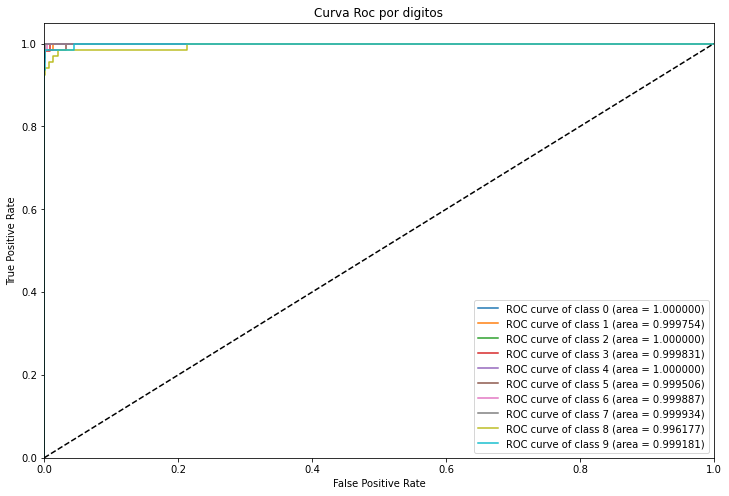

In [34]:
y = label_binarize(y, classes=[0,1,2,3,4,5,6,7,8,9])
n_classes = 10

# shuffle and split training and test sets
X_train2, X_test2, y_train2, y_test2 =\
    train_test_split(X, y, test_size=0.33, random_state=0)

# classifier
clf_roc = OneVsRestClassifier( SVC(kernel= 'rbf', C=3, degree=0))
y_score = clf_roc.fit(X_train2, y_train2).decision_function(X_test2)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test2[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
plt.figure(figsize=[12,8])

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i],label='ROC curve of class {0} (area = {1:f})'
             ''.format(i, roc_auc[i]))
    
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva Roc por digitos')
plt.legend(loc="lower right")
plt.show()

podemos ver que el modelo es muy eficiente, reconoce casi siempre el valor correcto

### Ejercicio 5
__Reducción de la dimensión:__ Tomando en cuenta el mejor modelo encontrado en el `Ejercicio 3`, debe realizar una redcción de dimensionalidad del conjunto de datos. Para ello debe abordar el problema ocupando los dos criterios visto en clases:  

* **Selección de atributos**
* **Extracción de atributos**

__Preguntas a responder:__

Una vez realizado la reducción de dimensionalidad, debe sacar algunas estadísticas y gráficas comparativas entre el conjunto de datos original y el nuevo conjunto de datos (tamaño del dataset, tiempo de ejecución del modelo, etc.)


In [35]:
X_new = digits.drop(columns="target").values
y_new = digits["target"].values
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.2, random_state=42)

In [36]:
k = 41
seleccionadas = SelectKBest(f_classif, k=k).fit(X_train, y_train)
catrib = seleccionadas.get_support()
atributos = [digits.columns[i] for i in list(catrib.nonzero()[0])]
digits_best=digits[atributos]

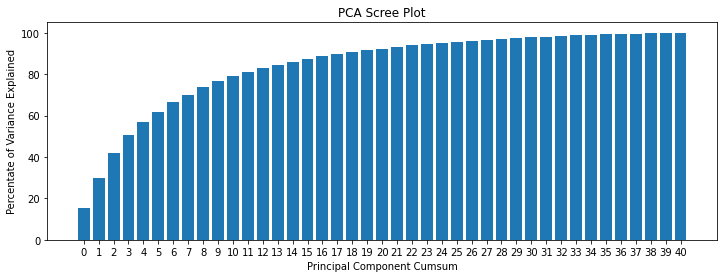

In [37]:
pca = PCA(n_components=41)
principalComponents = pca.fit_transform(digits_best)
percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2)
percent_variance_cum = np.cumsum(percent_variance)
columns = [str(x) for x in list(range(41))]
plt.figure(figsize=(12,4))
plt.bar(x= range(1,42), height=percent_variance_cum, tick_label=columns)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component Cumsum')
plt.title('PCA Scree Plot')
plt.show()

In [38]:
principaldf = pd.DataFrame(data = principalComponents[:,list(range(21))], columns = ['PC'+str(i) for i in range(21)])
targetDataframe = digits[['target']]
df_pca = pd.concat([principaldf, targetDataframe],axis = 1)
df_pca

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,...,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,target
0,-2.858154,21.910657,-7.610982,14.139074,-5.405816,-6.720590,2.696409,3.302387,0.701365,-3.686973,...,-4.335050,-0.431603,0.792621,2.004148,2.027119,1.808744,-4.672324,3.412475,0.669913,0
1,9.678509,-19.912325,2.801764,-14.424630,6.574480,-5.739814,3.008620,-5.628509,2.793186,2.210750,...,-5.231213,8.961867,-0.746873,-0.471558,1.476075,-6.580810,2.349762,5.064005,-1.849663,1
2,7.393181,-8.970243,2.345356,-11.496446,-17.752752,-8.219064,2.344683,-14.996146,-1.278873,-4.976939,...,7.788946,-2.683410,2.986686,-6.973667,-3.799012,3.843673,-2.409122,-1.712637,-4.172053,2
3,-15.495936,1.944537,9.432426,-12.214386,6.881507,2.953251,0.220102,11.580342,2.408373,-5.892429,...,-5.610692,-0.625105,-0.639377,2.826049,1.906026,0.191590,-2.090107,1.920048,4.120454,3
4,24.401968,6.179789,-4.088832,-12.933190,-0.264023,-4.476037,1.228339,13.659597,3.818962,-10.949468,...,4.319307,6.513287,5.962615,6.100843,-2.677563,-3.154495,-0.051967,-7.711354,4.121313,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,-15.176724,13.879573,-13.319404,-6.283645,4.059062,-1.487697,-6.074312,-5.088312,3.326477,8.146080,...,-2.366427,1.947988,4.963849,0.772731,-0.100676,-1.852654,-1.056549,-1.162880,1.961771,9
1793,5.056755,21.981762,-6.798510,14.356104,-6.098690,-12.684461,4.354317,-0.922161,-8.297486,3.078377,...,6.207061,2.439686,-4.209667,-1.758637,-1.855577,-1.515352,5.012568,2.002686,0.786095,0
1794,10.468399,-6.632695,5.589312,-7.497858,-2.448297,-15.480710,-4.022310,-3.834164,-8.013340,12.337428,...,-0.135839,-2.602819,8.285570,0.524574,4.118951,3.190707,-2.232621,-2.938078,0.947574,8
1795,-5.730121,13.299245,-10.680082,-5.620062,3.899213,2.717669,-5.244899,-6.343622,-3.474214,10.539405,...,-0.693595,4.710635,4.540925,4.089694,4.682138,4.208811,-0.993528,3.765549,1.482271,9


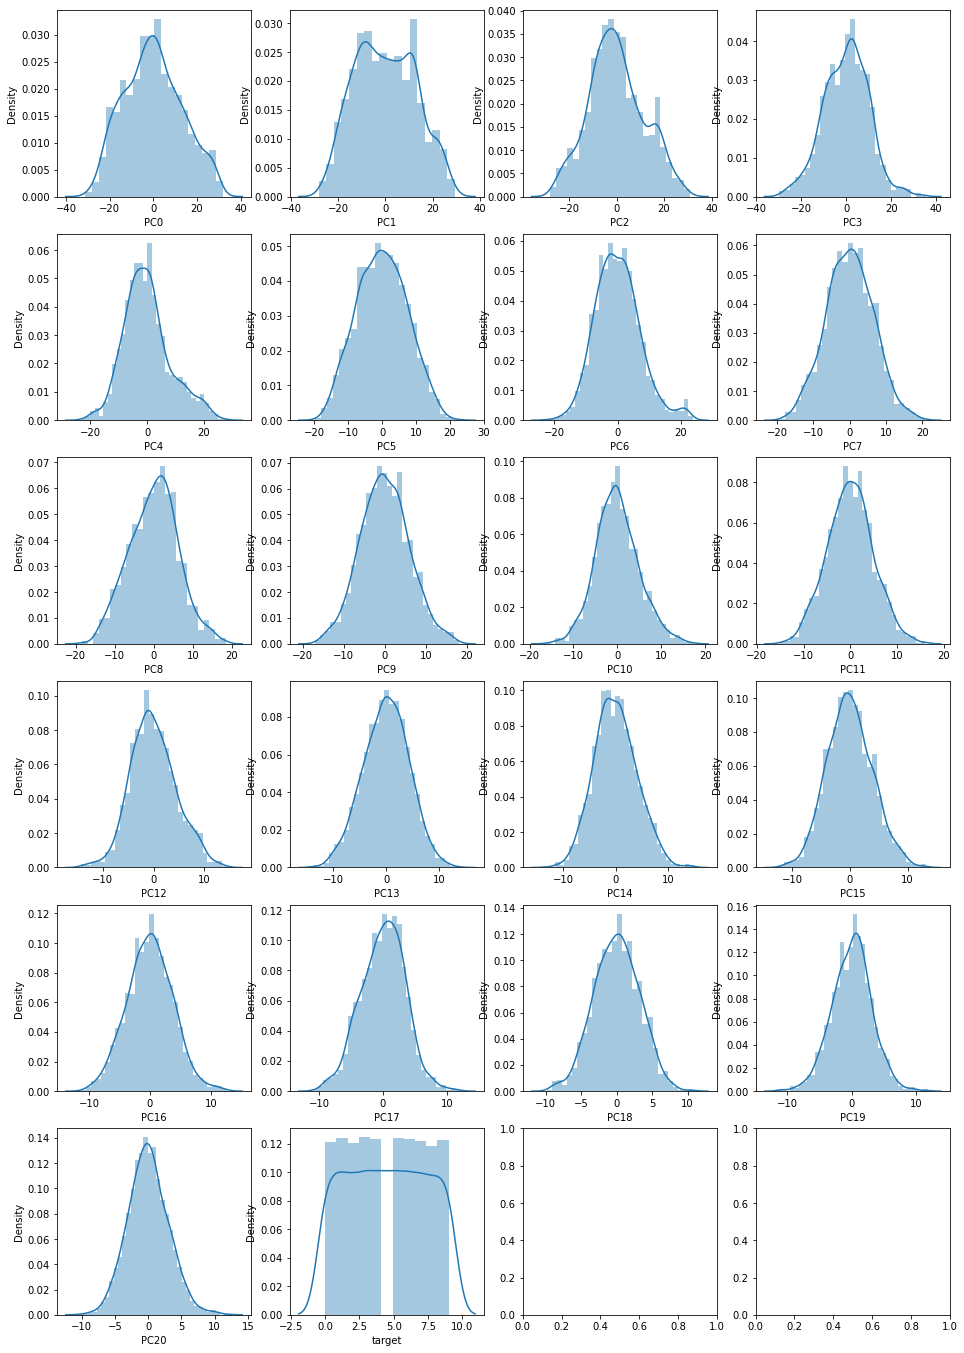

In [39]:
n_show = df_pca.shape[1]

fig, axes = plt.subplots(figsize=(16,4*int(np.ceil(n_show/4))), nrows=int(np.ceil(n_show/4)), ncols=4)
for i,  column in enumerate(df_pca.columns[:n_show]):
  sns.distplot(df_pca[column], hist=True, rug=False, kde=True, ax=axes[i//4,i%4],label=column)
  i = i+1
plt.show()

Notese que las nuevas distribuciones para el df_pca (dataframe obtenido del pca) son casi normales, luego cualquier estimacion se tendrá un excelente resultado.

In [40]:
X_pca = df_pca.drop(columns="target").values
y_pca = df_pca["target"].values
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_pca, test_size=0.2, random_state=42)
clf_pca =  SVC(kernel= 'rbf', C=3, degree=0)
clf_pca.fit(X_train,y_train)
y_pred = clf_pca.predict(X_test)
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        33
           1     1.0000    1.0000    1.0000        28
           2     1.0000    1.0000    1.0000        33
           3     1.0000    0.9706    0.9851        34
           4     0.9787    1.0000    0.9892        46
           5     0.9592    1.0000    0.9792        47
           6     1.0000    1.0000    1.0000        35
           7     1.0000    0.9706    0.9851        34
           8     1.0000    0.9667    0.9831        30
           9     0.9750    0.9750    0.9750        40

    accuracy                         0.9889       360
   macro avg     0.9913    0.9883    0.9897       360
weighted avg     0.9892    0.9889    0.9889       360



### Ejercicio 6


__Visualizando Resultados:__ A continuación se provee código para comparar las etiquetas predichas vs las etiquetas reales del conjunto de _test_. 


In [41]:
def mostar_resultados(digits,model,nx=5, ny=5,label = "correctos"):
    """
    Muestra los resultados de las prediciones de un modelo 
    de clasificacion en particular. Se toman aleatoriamente los valores
    de los resultados.
    
    - label == 'correcto': retorna los valores en que el modelo acierta.
    - label == 'incorrecto': retorna los valores en que el modelo no acierta.

    
    Observacion: El modelo que recibe como argumento debe NO encontrarse
    'entrenado'.
    
    
    :param digits: dataset 'digits'
    :param model: modelo de sklearn
    :param nx: numero de filas (subplots)
    :param ny: numero de columnas (subplots)
    :param label: datos correctos o incorrectos
    :return: graficos matplotlib
    """
    
    
    X = digits.drop(columns="target").values
    Y = digits["target"].values
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 42) 
    model.fit(X_train, Y_train) # ajustando el modelo
    Y_pred = list(model.predict(X_test))

    
    # Mostrar los datos correctos
    if label=="correctos":
        mask = (Y_pred == Y_test)
        color = "green"
        
    # Mostrar los datos correctos
    elif label=="incorrectos":
        mask = (Y_pred != Y_test)
        color = "red"
    
    else:
        raise ValueError("Valor incorrecto")
        
    X_aux = X_test[mask]
    y_aux_true = np.array(Y_test)[mask]
    y_aux_pred = np.array(Y_pred)[mask]

    # We'll plot the first 100 examples, randomly choosen
    fig, ax = plt.subplots(nx, ny, figsize=(12,12))
    for i in range(nx):
        for j in range(ny):
            index = j + ny * i
            data  = X_aux[index, :].reshape(8,8)
            label_pred = str(int(y_aux_pred[index]))
            label_true = str(int(y_aux_true[index]))
            ax[i][j].imshow(data, interpolation='nearest', cmap='gray_r')
            ax[i][j].text(0, 0, label_pred, horizontalalignment='center', verticalalignment='center', fontsize=10, color=color)
            ax[i][j].text(7, 0, label_true, horizontalalignment='center', verticalalignment='center', fontsize=10, color='blue')
            ax[i][j].get_xaxis().set_visible(False)
            ax[i][j].get_yaxis().set_visible(False)
    plt.show()

**Pregunta**

* Tomando en cuenta el mejor modelo entontrado en el `Ejercicio 3`, grafique los resultados cuando:
 * el valor predicho y original son iguales
 * el valor predicho y original son distintos 


* Cuando el valor predicho y original son distintos ,  ¿Por qué ocurren estas fallas?

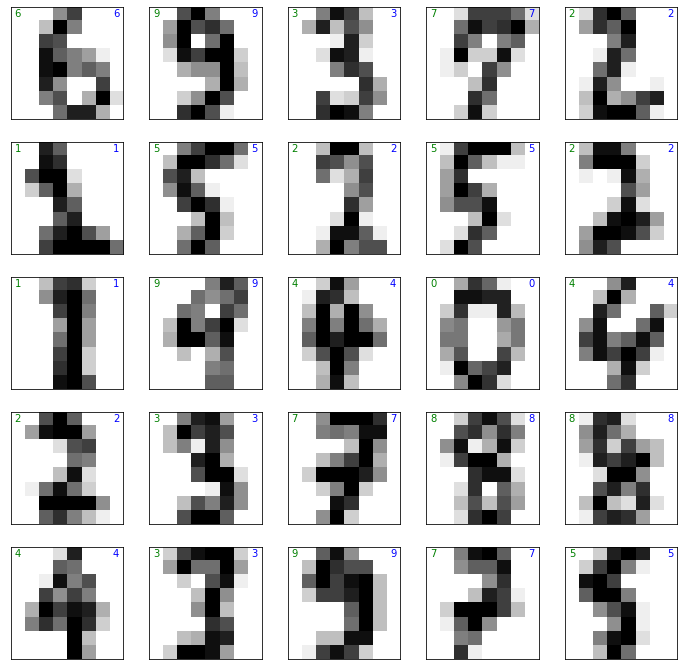

In [42]:
mostar_resultados(digits,SVC(kernel= 'rbf', C=3, degree=0),nx=5, ny=5,label = "correctos")

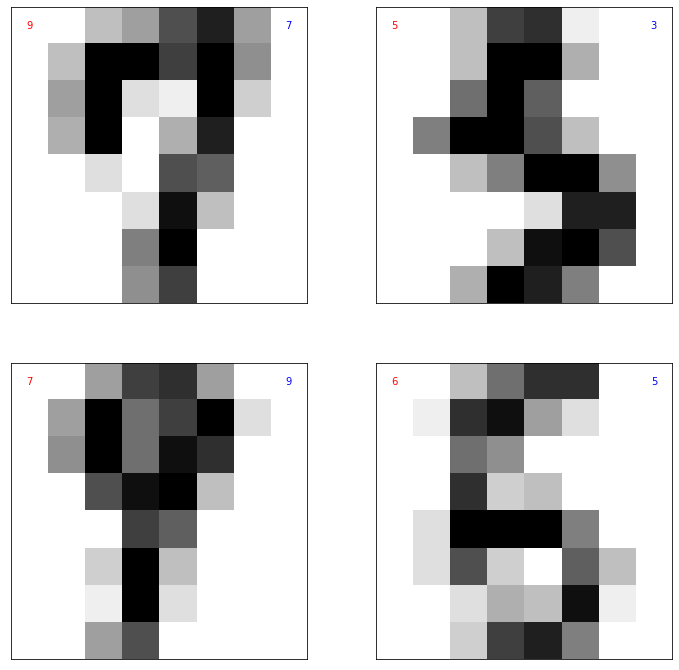

In [43]:
mostar_resultados(digits,SVC(kernel= 'rbf', C=3, degree=0),nx=2, ny=2,label = "incorrectos")

### Ejercicio 7
**Conclusiones**: Entrega tu veredicto, responde las preguntas iniciales, visualizaciones, trabajos futuros, dificultades, etc.

notamos que aunque tenga una  precicion muy buena  este comete  fallos, creo que  una buena opcion paramejorarel modelo es aumentar el numero de pixceles con el que se visualizan las imagenes para evitar que los tonos grices se confundan con lineas. 

## II.- California Housing Prices


<img src="https://www.wartsila.com/images/default-source/default-album/california_housing.tmb-1920x690.jpg?sfvrsn=126bc44_1" width="480" height="240" align="center"/>

Los datos se refieren a las casas encontradas en un distrito determinado de California y algunas estadísticas resumidas sobre ellas basadas en los datos del censo de 1990. Tenga en cuenta que los datos no se limpian, por lo que se requieren algunos pasos de procesamiento previo.

Las columnas son las siguientes, sus nombres se explican por sí mismos:

* longitude
* latitude
* housingmedianage
* total_rooms
* total_bedrooms
* population
* households
* median_income
* medianhousevalue
* ocean_proximity


El objetivo es poder predecir el valor promedio de cada propiedad. 
Para poder completar correctamente este laboratorio, es necesario seguir la siguiente rúbrica de trabajo:

1. Definición del problema
2. Estadística descriptiva
3. Visualización descriptiva
4. Preprocesamiento
5. Selección de modelo 
    1. Por lo menos debe comparar cuatro modelos
    2. Al menos tres de estos modelos tienen que tener hiperparámetros.
    3. Realizar optimización de hiperparámetros.
6. Métricas y análisis de resultados
7. Visualizaciones del modelo
8. Conclusiones

> **Observación**: Puede tomar como referencia lo realizado en la sección **I.- Clasificación de dígitos**. El alumno tiene la libertad de desarrollar un análisis más completo del problema (si así lo desea). Puede tomar como referencia el siguiente [link](https://www.kaggle.com/camnugent/california-housing-prices).

In [44]:
# read data
housing = pd.read_csv('data/housing.csv',sep=',')
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [45]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [46]:
label = LabelEncoder()

housing['ocean_proximity'] = label.fit_transform(housing['ocean_proximity'])
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,1
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,1
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,1
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,1


In [47]:
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [48]:
housing.fillna(method='pad', inplace=True)

In [49]:
housing.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [50]:
housing.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20640.0,537.642151,420.876678,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000
ocean_proximity,20640.0,1.165843,1.420662,0.0000,0.0000,1.0000,1.00000,4.0000


In [51]:
housing.iloc[:,:].describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20640.0,537.642151,420.876678,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000
ocean_proximity,20640.0,1.165843,1.420662,0.0000,0.0000,1.0000,1.00000,4.0000


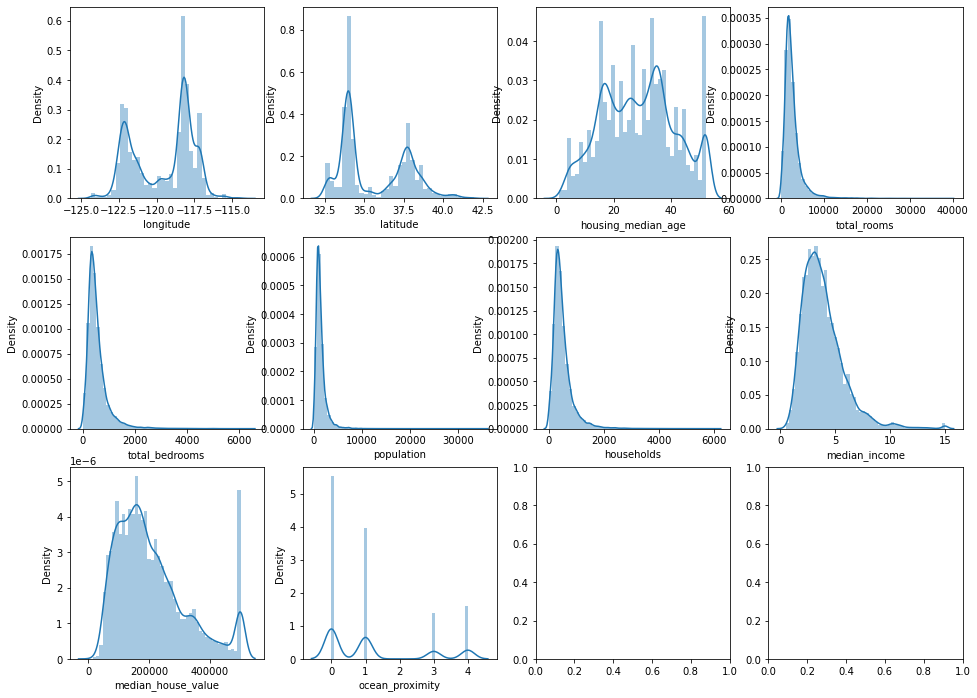

In [52]:
n_show_housing = housing.shape[1]

fig, axes = plt.subplots(figsize=(16,4*int(np.ceil(n_show_housing/4))), nrows=int(np.ceil(n_show_housing/4)), ncols=4)
for i,  column in enumerate(housing.columns[:n_show]):
  sns.distplot(housing[column], hist=True, rug=False, kde=True, ax=axes[i//4,i%4],label=column)
  i = i+1
plt.show()

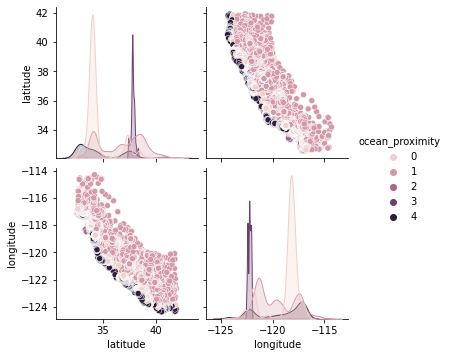

In [53]:
par=["latitude","longitude","ocean_proximity"]
sns.pairplot(data=housing[par],hue="ocean_proximity")

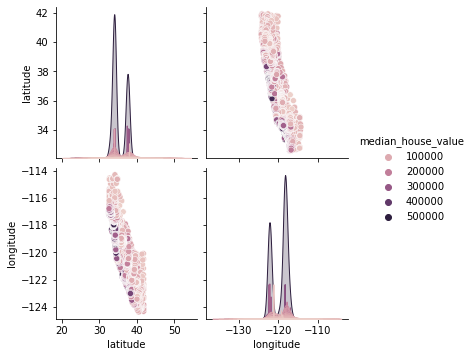

In [54]:
par=["latitude","longitude","median_house_value"]
sns.pairplot(data=housing[par],hue="median_house_value")

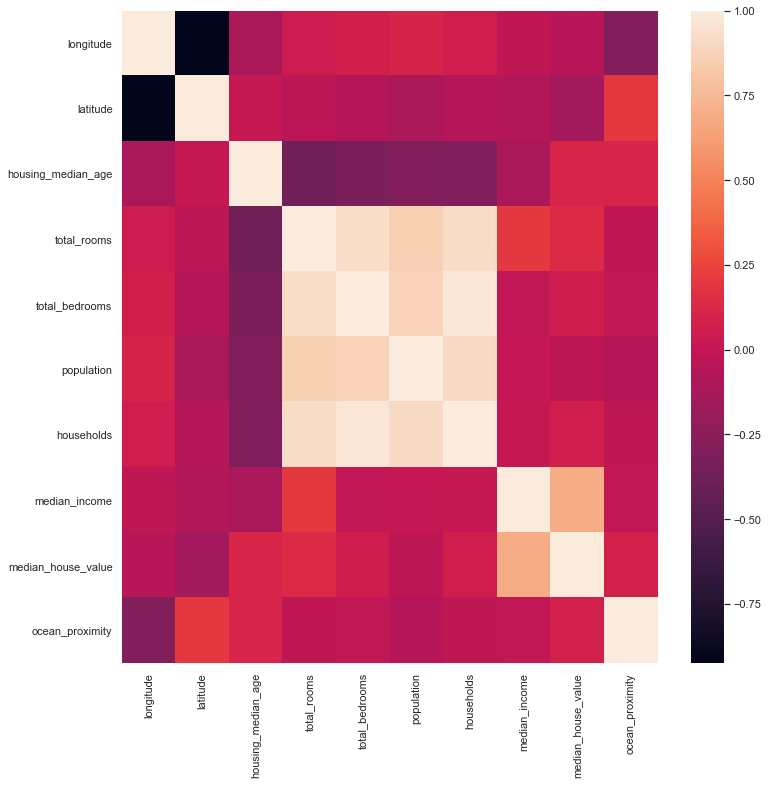

In [55]:
sns.set(rc={'figure.figsize': (12, 12)})
sns.heatmap(housing.corr())
plt.show()

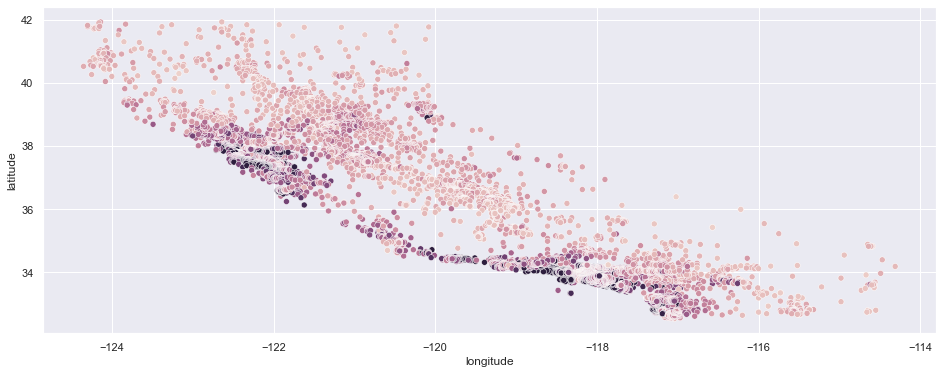

In [56]:
plt.figure(figsize=(16,6))
fig = sns.scatterplot(housing.longitude, housing.latitude, hue=housing['median_house_value'],
                      legend=False);

podemos intuir una correlacion entre latitud, longitude y ocean_proximity, ya que la latitud junto  a  la longitud se relacionan a la ubicacion y por el grafico anterior vemos que el precio aumenta cerca de la costa.

## Modelo

In [57]:
from sklearn.model_selection import train_test_split
X = housing.drop(['median_house_value', 'ocean_proximity'], axis=1)
y = housing['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=42)

## Comparemos modelos

In [58]:
lr = LinearRegression()
lr.fit(X_train, y_train)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
print("RL\n")
# de aqui predice para el conjunto de train
print("_____________________________")
print("conjunto de train")
pred_train_lr= lr.predict(X_train)
print("RMSE ", np.sqrt(mean_squared_error(y_train,pred_train_lr))) #RMSE error cuadratico medio
print("R^2 ",r2_score(y_train, pred_train_lr)) #R_cuadrado 
# de aqui predice para el conjunto de validacion
print("_____________________________")
print("_____________________________")
print("conjunto de validacion")
pred_test_lr= lr.predict(X_test)
print("RMSE ",np.sqrt(mean_squared_error(y_test,pred_test_lr))) #RMSE
print("R^2 ",r2_score(y_test, pred_test_lr))  #R_cuadrado (cor de pearson)
print("_____________________________")
print("MAPE")
print(np.mean(np.abs(((y_test - lr.predict(X_test))/y_test)))*100)
print("_____________________________\n\n")

alphas = 10**np.linspace(10,-2,100)*0.5  #array de posibles valores para alfa
ridge = Ridge(normalize = True) #se puede quitar el normalizador, pero ya esta normali
coefs = []

for a in alphas:     #haciendo muchos ridge, y guardamos los coef en la lista
    ridge.set_params(alpha = a)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)

#np.shape(coefs)
ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error', normalize = True)
ridgecv.fit(X_train, y_train)
#ridgecv.alphas

# sobre los datos de entrenamiento
ridge4 = Ridge(alpha = ridgecv.alpha_, normalize = True)
ridge4.fit(X_train, y_train)
mean_squared_error(y_test, ridge4.predict(X_test))
h=ridge4.fit(X,y).get_params()

rr = Ridge(alpha=h["alpha"]) #cambiar alfa despues con cross validation!!!
rr.fit(X_train, y_train) 
pred_train_rr= rr.predict(X_train)

print("Ridge\n")
# de aqui predice para el conjunto de train
print("_____________________________")
print("conjunto de train")
#para train
print("RMSE ",np.sqrt(mean_squared_error(y_train,pred_train_rr))) #RMSE
print("R^2 ",r2_score(y_train, pred_train_rr))  #R^cuadrado


 # de aqui predice para el conjunto de validacion
print("_____________________________")
print("_____________________________")
print("conjunto de validacion")
# para validation
pred_test_rr= rr.predict(X_test)
print("RMSE ",np.sqrt(mean_squared_error(y_test,pred_test_rr))) 
print("R^2 ",r2_score(y_test, pred_test_rr))
print("_____________________________")
print("MAPE")
print(np.mean(np.abs(((y_test - rr.predict(X_test))/y_test)))*100)
print("_____________________________\n\n")

lasso = Lasso(max_iter = 10000, normalize = True)
coefs_2 = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(scale(X_train), y_train)
    coefs_2.append(lasso.coef_)


lassocv = LassoCV(alphas = None, cv = 10, max_iter = 100000, normalize = True)
lassocv.fit(X_train, y_train)

lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train, y_train)
mean_squared_error(y_test, lasso.predict(X_test))


print("Lasso\n")
# de aqui predice para el conjunto de train
print("_____________________________")
print("conjunto de train")
#para train
print("RMSE ",np.sqrt(mean_squared_error(y_train, lasso.predict(X_train)))) #RMSE
print("R^2 ",r2_score(y_train, lasso.predict(X_train)))  #R^cuadrado


 # de aqui predice para el conjunto de validacion
print("_____________________________")
print("_____________________________")
print("conjunto de validacion")
# para validation
print("RMSE ",np.sqrt(mean_squared_error(y_test, lasso.predict(X_test)))) #RMSE
print("R^2 ",r2_score(y_test, lasso.predict(X_test)))  #R^cuadrado
print("_____________________________")
print("MAPE")
print(np.mean(np.abs(((y_test - lasso.predict(X_test))/y_test)))*100)
print("_____________________________\n\n")

print("Elastic\n")
model_enet = ElasticNet(alpha = 0.01) #cambiar alfa despues con cross validation!!!
model_enet.fit(X_train, y_train) 
pred_train_enet= model_enet.predict(X_train)
print("_____________________________")
print("conjunto de train")
#para train
print("RMSE ",np.sqrt(mean_squared_error(y_train,pred_train_enet)))
print("R^2 ",r2_score(y_train, pred_train_enet))
print("_____________________________")
print("_____________________________")
print("conjunto de validacion")
#para validacion
pred_test_enet= model_enet.predict(X_test)
print("RMSE ",np.sqrt(mean_squared_error(y_test,pred_test_enet)))
print("R^2 ",r2_score(y_test, pred_test_enet))

print("_____________________________")
print("MAPE")
print(np.mean(np.abs(((y_test - model_enet.predict(X_test))/y_test)))*100)
print("_____________________________\n\n")

print("Random Forest\n")
ran_forest = RandomForestRegressor() 
ran_forest.fit(X_train, y_train)

pred_train_random_forest = ran_forest.predict(X_train)
print("_____________________________")
print("conjunto de train")
#para train
print("RMSE ",np.sqrt(mean_squared_error(y_train,pred_train_random_forest)))
print("R^2 ",r2_score(y_train, pred_train_random_forest))
print("_____________________________")
print("_____________________________")
print("conjunto de validacion")
#para validacion
pred_test_random_forest = ran_forest.predict(X_test)
print("RMSE ",np.sqrt(mean_squared_error(y_test,pred_test_random_forest)))
print("R^2 ",r2_score(y_test, pred_test_random_forest))

print("_____________________________")
print("MAPE")
print(np.mean(np.abs(((y_test - ran_forest.predict(X_test))/y_test)))*100)
print("_____________________________\n\n")



RL

_____________________________
conjunto de train
RMSE  69750.66570598472
R^2  0.6368463107869555
_____________________________
_____________________________
conjunto de validacion
RMSE  69841.73667547139
R^2  0.6283642570000889
_____________________________
MAPE
30.65265601811944
_____________________________


Ridge

_____________________________
conjunto de train
RMSE  69750.66570599558
R^2  0.6368463107868424
_____________________________
_____________________________
conjunto de validacion
RMSE  69841.73592696319
R^2  0.6283642649658817
_____________________________
MAPE
30.652654898179343
_____________________________


Lasso

_____________________________
conjunto de train
RMSE  69753.97502894657
R^2  0.6368118502885562
_____________________________
_____________________________
conjunto de validacion
RMSE  69814.56859661998
R^2  0.6286533295770822
_____________________________
MAPE
30.657000552124718
_____________________________


Elastic

_____________________________
conju

In [59]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
parameters_knn = {'n_neighbors':[1, 10]}
knn = KNeighborsClassifier()
gs = GridSearchCV(knn, parameters_knn)
gs.fit(X_train, y_train)
print("Best: %f con %s" % (gs.best_score_, gs.best_params_))

Best: 0.030177 con {'n_neighbors': 10}


In [60]:
print("KNeighbors\n")
knn = KNeighborsClassifier(n_neighbors= 10)
knn.fit(X_train, y_train)

pred_train_knn = knn.predict(X_train)
print("_____________________________")
print("conjunto de train")
#para train
print("RMSE ",np.sqrt(mean_squared_error(y_train,pred_train_knn)))
print("R^2 ",r2_score(y_train, pred_train_knn))
print("_____________________________")
print("_____________________________")
print("conjunto de validacion")
#para validacion
pred_test_knn = knn.predict(X_test)
print("RMSE ",np.sqrt(mean_squared_error(y_test,pred_test_knn)))
print("R^2 ",r2_score(y_test, pred_test_knn))

print("_____________________________")
print("MAPE")
print(np.mean(np.abs(((y_test - knn.predict(X_test))/y_test)))*100)
print("_____________________________\n\n")


KNeighbors

_____________________________
conjunto de train
RMSE  146981.00756044054
R^2  -0.6125611292980913
_____________________________
_____________________________
conjunto de validacion
RMSE  154784.35205904848
R^2  -0.8253305555929786
_____________________________
MAPE
57.85630625682134
_____________________________




el mejor modelo parece ser el random forest

In [61]:
ran_forest = RandomForestRegressor() 
ran_forest.fit(X_train, y_train)

y_pred_ran_forest = ran_forest.predict(X_test)

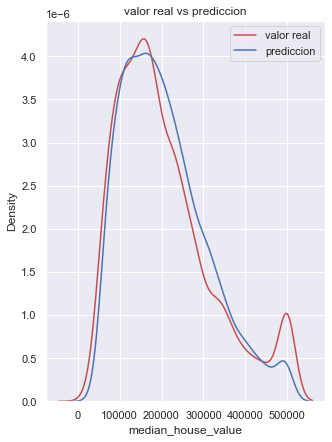

In [62]:
plt.figure(figsize=(5, 7))


ax = sns.distplot(y_test, hist=False, color="r", label="valor real")
sns.distplot(y_pred_ran_forest, hist=False, color="b", label="prediccion" , ax=ax)


plt.title('valor real vs prediccion')
plt.legend()

plt.show()
plt.close()

podemos ver que la prediccion es buena aunque no perfecta